## Web Crawling with Scrapy

In [1]:
import pandas as pd

In [17]:
file_path: str = "data/SMSSpamCollection"

df = pd.read_csv(file_path, sep='\t', header=None, names=['label', 'text'])
df.head()

label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

TODO Sanity checks: Read the readme file in the data folder. How could we check if the data is read correctly?

In [18]:
len(df) # number of rows

5572

TODO Check if values are null? (If labels or text are null, remove the rows)

TODO describe the data statistically using pandas
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

### Text Analysis

In [24]:
def preprocess_text(text: str):
    return text.split()

In [25]:
preprocessed_column: str = "preprocessed_text"
text_column : str = 'text'

# tokenize and normalize text
df[preprocessed_column] = df[text_column].apply(preprocess_text)

<Axes: ylabel='Frequency'>

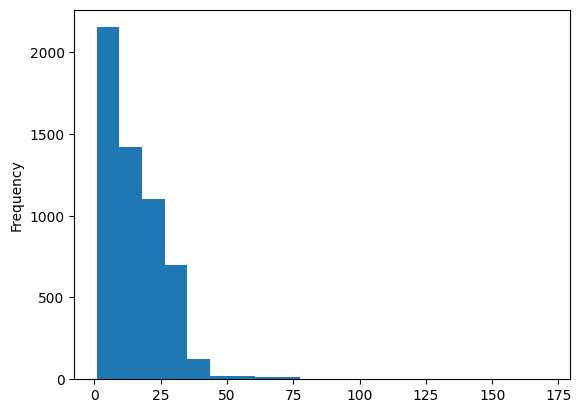

In [31]:
# TODO: add diagram title, tiltes for X/Y

df[preprocessed_column].apply(len).plot(kind="hist", bins=20)

In [35]:
# TODO count the least frequent terms
df.explode(preprocessed_column)[preprocessed_column].value_counts()[:20]

preprocessed_text
to      2145
you     1626
I       1469
a       1337
the     1207
and      858
in       800
is       788
i        748
u        698
for      650
my       630
of       592
me       561
your     561
on       488
have     477
2        457
that     422
it       397
Name: count, dtype: int64

In [ ]:
# TODO many of the top frequent words are stopwords. Remove them using NLTK
# use the corpus module for that (https://www.nltk.org/howto/corpus.html#word-lists-and-lexicons)predictionprepre
#import nltk
#nltk.download('stopwords')


### Correlations

In [49]:
# take the 30 most frequent words, and correlate to labels
df_words_exploded = df.explode(preprocessed_column)
top_50_words: list[str] = df_words_exploded[preprocessed_column].value_counts()[:20].index.tolist()
top_50_words

['to',
 'you',
 'I',
 'a',
 'the',
 'and',
 'in',
 'is',
 'i',
 'u',
 'for',
 'my',
 'of',
 'me',
 'your',
 'on',
 'have',
 '2',
 'that',
 'it']

In [50]:
columns = ['is_spam']
df['is_spam'] = df['label']=='spam'

for token in top_50_words:
    token_column = f"{token}_count"
    df[token_column] = df[preprocessed_column].apply(lambda token_list: token_list.count(token))
    columns.append(token_column)

In [53]:
df[columns].corr()

is_spam  to_count  you_count   I_count   a_count  the_count  \
is_spam     1.000000  0.240588  -0.042509 -0.143861  0.178562   0.015794   
to_count    0.240588  1.000000   0.207554  0.134136  0.186883   0.177019   
you_count  -0.042509  0.207554   1.000000  0.234524  0.120675   0.160920   
I_count    -0.143861  0.134136   0.234524  1.000000  0.087838   0.112481   
a_count     0.178562  0.186883   0.120675  0.087838  1.000000   0.119957   
the_count   0.015794  0.177019   0.160920  0.112481  0.119957   1.000000   
and_count   0.004763  0.192547   0.197583  0.172260  0.118820   0.222557   
in_count   -0.058565  0.069949   0.065207  0.078567  0.114249   0.140775   
is_count    0.046483  0.080412   0.026014 -0.017859  0.097731   0.155745   
i_count    -0.111993  0.098991   0.102080  0.026353  0.046695   0.087703   
u_count    -0.053030  0.007376  -0.098982  0.022201  0.022928   0.009918   
for_count   0.115976  0.144796   0.076721  0.063682  0.111384   0.138790   
my_count   -0.102202  0.085433   0.095993  0.238503  0.081207   0.073974   
of_count    0.020572  0.081669   0.085488  0.057129  0.191811   0.204530   
me_count   -0.085373  0.116800   0.164837  0.090593  0.034968   0.057077   
your_count  0.168246  0.127609   0.188027  0.089010  0.011914   0.042252   
on_count    0.117977  0.069336   0.044778  0.036661  0.091759   0.146968   
have_count  0.110635  0.149263   0.123872  0.078225  0.172782   0.121754   
2_count     0.170459 -0.025382  -0.086519  0.018096  0.058988  -0.003990   
that_count -0.060127  0.129604   0.179555  0.109554  0.098117   0.157787   
it_count   -0.057666  0.096054   0.112248  0.096101  0.048875   0.135554   

            and_count  in_count  is_count   i_count  ...  for_count  my_count  \
is_spam      0.004763 -0.058565  0.046483 -0.111993  ...   0.115976 -0.102202   
to_count     0.192547  0.069949  0.080412  0.098991  ...   0.144796  0.085433   
you_count    0.197583  0.065207  0.026014  0.102080  ...   0.076721  0.095993   
I_count      0.172260  0.078567 -0.017859  0.026353  ...   0.063682  0.238503   
a_count      0.118820  0.114249  0.097731  0.046695  ...   0.111384  0.081207   
the_count    0.222557  0.140775  0.155745  0.087703  ...   0.138790  0.073974   
and_count    1.000000  0.100598  0.081679  0.120495  ...   0.141615  0.164868   
in_count     0.100598  1.000000  0.031456  0.022480  ...   0.041791  0.074201   
is_count     0.081679  0.031456  1.000000  0.038450  ...   0.081048  0.065301   
i_count      0.120495  0.022480  0.038450  1.000000  ...   0.037822  0.089944   
u_count     -0.011019  0.031698  0.102898  0.058877  ...   0.006861  0.022025   
for_count    0.141615  0.041791  0.081048  0.037822  ...   1.000000  0.071380   
my_count     0.164868  0.074201  0.065301  0.089944  ...   0.071380  1.000000   
of_count     0.100426  0.079298  0.129060  0.040030  ...   0.024807  0.142845   
me_count     0.132630  0.038540 -0.011621  0.068547  ...   0.050389  0.155213   
your_count   0.094075 -0.007310  0.009282 -0.020018  ...   0.152487  0.038989   
on_count     0.087951  0.010154  0.049761  0.039162  ...   0.067516  0.099326   
have_count   0.119935  0.038602  0.052191  0.106133  ...   0.038554  0.037934   
2_count     -0.043395  0.044883  0.032308  0.010518  ...   0.005349  0.006001   
that_count   0.133331  0.086918  0.076853  0.089925  ...   0.084968  0.066345   
it_count     0.133029  0.078376  0.081892  0.086226  ...   0.020809  0.058187   

            of_count  me_count  your_count  on_count  have_count   2_count  \
is_spam     0.020572 -0.085373    0.168246  0.117977    0.110635  0.170459   
to_count    0.081669  0.116800    0.127609  0.069336    0.149263 -0.025382   
you_count   0.085488  0.164837    0.188027  0.044778    0.123872 -0.086519   
I_count     0.057129  0.090593    0.089010  0.036661    0.078225  0.018096   
a_count     0.191811  0.034968    0.011914  0.091759    0.172782  0.058988   
the_count   0.204530  0.057077    0.042252  0.146968    0.121754 -0.003990   
and_count  

In [54]:
import seaborn

seaborn.heatmap(df[columns].corr())

<Axes: >

In [ ]:
# save data to csv
df.to_csv('data/prepared_sms_data.csv', index=False)

In [1]:
# --- Setup 1: Imports ---
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score
import re 

print("Bibliotheken importiert.")

Bibliotheken importiert.


In [2]:
# --- Setup 2: NLTK Stoppwörter herunterladen/laden ---
try:
    stopwords.words('german')
    print("Deutsche Stoppwörter sind bereits verfügbar.")
except LookupError:
    print("Lade NLTK Stoppwörter herunter...")
    nltk.download('stopwords')
    print("Download abgeschlossen.")

german_stopwords = stopwords.words('german')
print(f"{len(german_stopwords)} deutsche Stoppwörter geladen.")

Deutsche Stoppwörter sind bereits verfügbar.
232 deutsche Stoppwörter geladen.


In [9]:
# --- Task 1: Daten laden & Bereinigen (Datei im aktuellen Ordner erwartet) ---

# --- > HIER ANPASSEN, FALLS NÖTIG < ---
# 1. Dateiname (im selben Ordner wie das Notebook)
file_name = './articles.csv'  # <-- Überprüfe, ob die Datei WIRKLICH so heißt!

# 2. Trennzeichen (Komma ist Standard für CSV)
separator = ','  # <-- Ändere dies zu '\t' (Tab) oder ';' (Semikolon), falls nötig!

# 3. Spaltennamen (Standard für diesen Datensatz)
category_column_name = 'category' 
text_column_name = 'text'         
required_cols = [category_column_name, text_column_name]
# --- > ENDE DER ANPASSUNGEN < ---

file_path_to_load = file_name 

try:
    print(f"Versuche, Datei '{file_path_to_load}' im aktuellen Ordner mit Separator '{separator}' zu laden...")
    # Lade die CSV-Datei mit dem angegebenen Trennzeichen
    df = pd.read_csv(file_path_to_load, sep=separator) 
    print(f"Datei erfolgreich geladen. Ursprüngliche Form: {df.shape}")

    # Überprüfe, ob die notwendigen Spalten vorhanden sind
    if not all(col in df.columns for col in required_cols):
        print(f"FEHLER: Erwartete Spalten '{required_cols}' nicht im DataFrame gefunden.")
        print(f"Gefundene Spalten: {df.columns.tolist()}")
        print("-> Bitte überprüfe die Variablennamen 'category_column_name' und 'text_column_name' oben.")
        raise ValueError("Erforderliche Spalten fehlen.")
    else:
        # Task 1.1: Zeilen mit leeren Werten in den benötigten Spalten entfernen
        print(f"Zeilen vor NA-Entfernung: {len(df)}")
        df.dropna(subset=required_cols, inplace=True)
        print(f"Zeilen nach NA-Entfernung: {len(df)}")
        
        # Task 1.2: Doppelte Zeilen entfernen (basierend auf den benötigten Spalten)
        print(f"Zeilen vor Duplikat-Entfernung: {len(df)}")
        df.drop_duplicates(subset=required_cols, inplace=True)
        print(f"Zeilen nach Duplikat-Entfernung: {len(df)}")
        
        print("\nDaten erfolgreich geladen und bereinigt.")
        print("Erste 5 Zeilen:")
        print(df.head())
        print("\nInfo:")
        df.info()

except FileNotFoundError:
    print(f"FEHLER: Datei '{file_path_to_load}' wurde im aktuellen Ordner nicht gefunden.")
    print("--> Stelle sicher, dass die Datei WIRKLICH hier liegt und der Name in 'file_name' korrekt ist.")
    df = pd.DataFrame({category_column_name: [], text_column_name: []}) # Leerer DataFrame für Folgeschritte
except pd.errors.ParserError as e:
     print(f"FEHLER beim Lesen der CSV: {e}")
     print(f"-> Das Trennzeichen ('separator') im Code ('{separator}') scheint nicht korrekt zu sein.")
     print("   Öffne die Datei in einem einfachen Texteditor und schaue, was die Spalten trennt (oft ',', ';', oder '\\t').")
     print("   Passe dann die Variable 'separator' oben im Code an.")
     df = pd.DataFrame({category_column_name: [], text_column_name: []}) # Leerer DataFrame
except ValueError as e: # Fängt den Fehler ab, wenn Spalten fehlen
    print(f"FEHLER: {e}")
    df = pd.DataFrame({category_column_name: [], text_column_name: []}) # Leerer DataFrame
except Exception as e: # Fängt alle anderen unerwarteten Fehler ab
    print(f"Ein unerwarteter Fehler ist aufgetreten: {e}")
    df = pd.DataFrame({category_column_name: [], text_column_name: []}) # Leerer DataFrame

Versuche, Datei './articles.csv' im aktuellen Ordner mit Separator ',' zu laden...
FEHLER beim Lesen der CSV: Error tokenizing data. C error: Expected 10 fields in line 3, saw 56

-> Das Trennzeichen ('separator') im Code (',') scheint nicht korrekt zu sein.
   Öffne die Datei in einem einfachen Texteditor und schaue, was die Spalten trennt (oft ',', ';', oder '\t').
   Passe dann die Variable 'separator' oben im Code an.


In [ ]:
# --- Task 2: Textvorverarbeitung (Stoppwörter, Kleinbuchstaben) ---
def preprocess_text(text):
    """Wandelt Text in Kleinbuchstaben um, entfernt Stoppwörter und einfache Satzzeichen."""
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text, flags=re.UNICODE) # Entfernt Satzzeichen etc.
    words = text.split()
    filtered_words = [word for word in words if word not in german_stopwords]
    return ' '.join(filtered_words)

if text_column_name in df.columns and not df.empty:
    print("\nBeginne Textvorverarbeitung...")
    df['processed_text'] = df[text_column_name].apply(preprocess_text)
    print("Textvorverarbeitung abgeschlossen.")
    print(df[[text_column_name, 'processed_text']].head())
else:
    print(f"\nÜberspringe Task 2, da '{text_column_name}' fehlt oder DataFrame leer ist.")

In [ ]:
# --- Task 3: Labels kodieren ---
if category_column_name in df.columns and not df.empty:
    print("\nKodiere Labels...")
    label_encoder = LabelEncoder()
    df['label_encoded'] = label_encoder.fit_transform(df[category_column_name])
    print("Label-Kodierung abgeschlossen.")
    label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print("\nLabel-Zuordnung:")
    for category, code in sorted(label_mapping.items()):
        print(f"  '{category}': {code}")
    print(df[[category_column_name, 'label_encoded']].head())
else:
    print(f"\nÜberspringe Task 3, da '{category_column_name}' fehlt oder DataFrame leer ist.")

In [ ]:
# --- Task 4: Train/Test Split ---
if 'processed_text' in df.columns and 'label_encoded' in df.columns and not df.empty:
    X = df['processed_text']
    y = df['label_encoded']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print("\nDaten erfolgreich in Trainings- (80%) und Testset (20%) aufgeteilt.")
    print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
else:
    print("\nÜberspringe Task 4, da benötigte Spalten fehlen oder DataFrame leer ist.")
    # Platzhalter
    X_train, X_test, y_train, y_test = pd.Series([]), pd.Series([]), pd.Series([]), pd.Series([])

In [ ]:
# --- Zwischenschritt: Feature Extraction mit TF-IDF ---
if not X_train.empty:
    print("\nErstelle TF-IDF Vektoren...")
    tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Optional: Begrenzt die Feature-Anzahl
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    print("TF-IDF Vektorisierung abgeschlossen.")
    print(f"X_train_tfidf shape: {X_train_tfidf.shape}")
else:
    print("\nÜberspringe TF-IDF, da Trainingsdaten leer sind.")
    X_train_tfidf, X_test_tfidf = None, None

In [ ]:
# --- Task 5 & 6: Modelle trainieren ---
classifiers = {} 

if X_train_tfidf is not None and not y_train.empty:
    print("\nBeginne Training der Modelle...")

    # Task 5: Logistische Regression
    print("Training Logistische Regression...")
    log_reg = LogisticRegression(max_iter=1000, random_state=42).fit(X_train_tfidf, y_train)
    classifiers["Logistische Regression"] = log_reg
    print("-> Fertig.")

    # Task 6: Random Forest
    print("Training Random Forest...")
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1).fit(X_train_tfidf, y_train)
    classifiers["Random Forest"] = rf_clf
    print("-> Fertig.")

    # Task 6: Linear SVC
    print("Training LinearSVC...")
    svc_clf = LinearSVC(max_iter=2000, random_state=42, dual="auto").fit(X_train_tfidf, y_train)
    classifiers["Linear SVC"] = svc_clf
    print("-> Fertig.")

    print("\nAlle Modelle erfolgreich trainiert.")
else:
    print("\nÜberspringe Task 5 & 6, da TF-IDF Features oder Labels fehlen.")

In [ ]:
# --- Task 7: Ergebnisse vergleichen ---
results = []

if classifiers and X_test_tfidf is not None and not y_test.empty:
    print("\nEvaluiere Modelle auf dem Testset...")
    for name, clf in classifiers.items():
        y_pred = clf.predict(X_test_tfidf)
        accuracy = accuracy_score(y_test, y_pred)
        f1_micro = f1_score(y_test, y_pred, average='micro')
        f1_macro = f1_score(y_test, y_pred, average='macro')
        results.append({
            "Modell": name,
            "Genauigkeit": accuracy,
            "F1 Micro": f1_micro,
            "F1 Macro": f1_macro
        })
        print(f"  Ergebnisse für {name}: Acc={accuracy:.4f}, F1-Micro={f1_micro:.4f}, F1-Macro={f1_macro:.4f}")

    results_df = pd.DataFrame(results)
    results_df.sort_values(by="F1 Macro", ascending=False, inplace=True) 
    print("\n--- Gesamtvergleich der Ergebnisse ---")
    print(results_df.to_string(index=False))
else:
    print("\nÜberspringe Task 7, da Modelle oder Testdaten fehlen.")

# --- Ende der Aufgaben ---